#### Import Libraries

In [433]:
# Neccesary Package
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Import module
import design
from design import category, clean_product_name, ctgry_extract, dsgn_extract, standardize_dates

# Force Python to reload the module with updated code
import importlib
importlib.reload(design)

# Reset rows behavior
pd.reset_option('display.max_rows')

#### Load

In [158]:
# Load combined dataset from each platform
df_tiktok = pd.read_excel(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\TikTok_23_24.xlsx')
df_shopee = pd.read_excel(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\Shopee_23_24.xlsx')
df_website = pd.read_excel(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\Website_23_24.xlsx')

In [159]:
# Load lookup file
database = pd.read_excel(r'C:\Users\wareh\Documents\Data Analyst Project\Database.xlsx')
database[:2]

,SKU PICKLIST,PRODUCT NAME,COLOR,SIZE,"NAME, COLOR, SIZE",SKU FAMILY,NICK NAME
0,LNT 3.01.00S/M,Laana Top,Black,S/M,Laana / Black - S/M,LNT,Laana
1,LNT 3.01.00L/XL,Laana Top,Black,L/XL,Laana / Black - L/XL,LNT,Laana


#### Combine

In [255]:
# df_tiktok[df_tiktok['Order Refund Amount'].isnull()==False][:2]

In [256]:
# quick overview
display(df_tiktok[:2],
df_shopee[:2],
df_website[:2])

,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity
0,INHANNA Haifa Printed Ruffles Kurung Kedah,INH010360500XL,1,MYR 124.00,Tiktok,22/09/2023 12:29:44,0
1,INHANNA Adela Plain Gathered Dress,INH070180902S/M,1,MYR 113.90,Tiktok,23/09/2023 05:31:57,0


,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity
0,INHANNA BASIC Nia Relaxed Blouse,INB030010600-S/M,1,142.9,Shopee,2023-01-01 03:03,NaN
1,INHANNA BASIC Nia Relaxed Blouse,INB030010800-S/M,1,142.9,Shopee,2023-01-01 03:03,NaN


,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity
0,Intan Kebaya Tangerine Orange,INB020011101XL,1,0.0,Website,2023-01-03 17:02:41,Delivered
1,Uzma Lounge Kaftan Brown,INH070120900L,1,0.0,Website,2023-01-04 17:48:20,Delivered


In [257]:
# rename relevant column
df_tiktok.rename(columns={'Product Name': 'Product', 'Seller SKU': 'SKU', 'Quantity': 'Quantity', 'Order Amount' : 'Nett_Amount', 'Created Time' : 'Order_Date', 'Sku Quantity of return' : 'Returned_Quantity'}, inplace=True)
df_shopee.rename(columns={'Product Name': 'Product', 'SKU Reference No.': 'SKU', 'Quantity': 'Quantity', 'Grand Total' : 'Nett_Amount', 'Order Creation Date' : 'Order_Date', 'Returned quantity' : 'Returned_Quantity'}, inplace=True)
df_website.rename(columns={'PRODUCT_NAME': 'Product', 'PRODUCT_MODEL': 'SKU', 'PRODUCT_QTY': 'Quantity', 'TOTAL' : 'Nett_Amount', 'DATE_PURCHASED' : 'Order_Date', 'ORDER_STATUS' : 'Returned_Quantity'}, inplace=True)

In [258]:
# combine related columns
df_tiktok = df_tiktok[['Product', 'SKU', 'Quantity', 'Nett_Amount', 'Store', 'Order_Date', 'Returned_Quantity']]
df_shopee = df_shopee[['Product', 'SKU', 'Quantity', 'Nett_Amount', 'Store', 'Order_Date', 'Returned_Quantity']]
df_website = df_website[['Product', 'SKU', 'Quantity', 'Nett_Amount', 'Store', 'Order_Date', 'Returned_Quantity']]

dfx_combine = pd.concat([df_tiktok,df_shopee,df_website],ignore_index=True)
dfx_combine[:2]

,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity
0,INHANNA Haifa Printed Ruffles Kurung Kedah,INH010360500XL,1,MYR 124.00,Tiktok,22/09/2023 12:29:44,0
1,INHANNA Adela Plain Gathered Dress,INH070180902S/M,1,MYR 113.90,Tiktok,23/09/2023 05:31:57,0


#### Save (checkpoint #1)

In [259]:
# save
pd.DataFrame(dfx_combine).to_excel('#1CombinedPlatform_23_23.xlsx', index=False, engine='openpyxl')

#### Load (checkpoint #1)

In [463]:
# Load checkpount #1
df_combine = pd.read_excel(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\#1CombinedPlatform_23_23.xlsx')

#### Save (checkpoint #2)

In [504]:
# save
pd.DataFrame(df_combine).to_excel('#2CombinedPlatform_23_23.xlsx', index=False)

#### Load (checkpoint #2) 

In [505]:
# Load checkpount #2
df2_combine = pd.read_excel(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\#2CombinedPlatform_23_23.xlsx')

#### Workspace (checkpoint #1)

In [503]:
display(df_combine[:1])
df_combine.info()

,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity,Year_Month,Design,Category,Product_Name,Product_Desc
0,INHANNA Haifa Printed Ruffles Kurung Kedah,INH010360500XL,1,124,Tiktok,2023-09-22 12:29:44,0,2023-09,Haifa Printed,Kurung Kedah,Haifa Printed Kurung Kedah,Haifa Printed / Green - XL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101787 entries, 0 to 101786
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype    
---  ------             --------------   -----    
 0   Product            101787 non-null  object   
 1   SKU                101787 non-null  object   
 2   Quantity           101787 non-null  int64    
 3   Nett_Amount        101787 non-null  int64    
 4   Store              101787 non-null  object   
 5   Order_Date         101787 non-null  object   
 6   Returned_Quantity  101787 non-null  int64    
 7   Year_Month         101787 non-null  period[M]
 8   Design             100675 non-null  object   
 9   Category           99536 non-null   object   
 10  Product_Name       100793 non-null  object   
 11  Product_Desc       100793 non-null  object   
dtypes: int64(3), object(8), period[M](1)
memory usage: 9.3+ MB


In [ ]:
# # filter int
# df_combine['Nett_Amount'][df_combine['Store']=='Tiktok']

# # filter date
df_combine[['Year_Month', 'Store']][(df_combine['Store'].str.contains('Tiktok|Shopee|Website')) &
                                    (df_combine['Year_Month']<'2023-09')]

# # filter SKU with '-'
# df_combine[df_combine['SKU'].str.contains('-')] [:3]

# df_combine[(df_combine['Store'].str.contains('Shopee|Website|Tiktok')) &
#                                     (df_combine['Order_Date']>'2024-10')] [:3]

# df_combine['Order_Date'][df_combine['Store']=='Tiktok']

In [484]:
# clean
convert = ['Nett_Amount', 'Returned_Quantity']

df_combine[convert] = df_combine[convert].replace(r'[^\d\.]','',regex=True)
df_combine['SKU'] = df_combine['SKU'].replace(r'-','', regex=True) # remove '-'

In [488]:
# convert data types
df_combine[convert] = df_combine[convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

# convert datetime
date_tt = df_combine[df_combine['Store'].str.contains('Tiktok')]
date_shweb = df_combine[df_combine['Store'].str.contains('Shopee|Website')]

date_tt['Order_Date'] = date_tt['Order_Date'].apply(pd.to_datetime, dayfirst=True, errors='coerce')
date_shweb['Order_Date'] = date_shweb['Order_Date'].apply(pd.to_datetime, errors='coerce')

df_combine['Year_Month'] = pd.to_datetime(df_combine['Order_Date']).dt.to_period('M')

In [496]:
# apply function
from design import *
df_combine['Design'] = df_combine['Product'].apply(design.dsgn_extract)
df_combine['Category'] = df_combine['Product'].apply(design.ctgry_extract)

In [502]:
# find incomplete SKU
replace_sku = df_combine[(df_combine['Design'].str.contains(r'\bJenna\b', regex=True, na=False)) &
                         (df_combine['SKU'].str.contains(r'^JKS|INH', regex=True, na=False)) &
                         (df_combine['Product_Name'].isnull()==True)]

# replace_sku.replace(r'^([A-Z]{3}[0-9 .]{8})$', r'\1' + 'FS', regex=True) # ABC 1.23.45XX
# replace_sku.replace(r'^([A-Z]{3}\d{9})$', r'\1' + 'FS', regex=True) # INH123456789XXX
replace_sku['SKU'] = replace_sku['SKU'].replace(r'^([A-Z]{3}[0-9 .]{8}|[A-Z]{3}\d{9})$', r'\1' + 'FS', regex=True) # capture both
df_combine.update(replace_sku)

replace_sku[:1]

,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity,Year_Month,Design,Category,Product_Name,Product_Desc


In [501]:
# find leading whitespace
lspace_sku = df_combine[(df_combine['SKU'].str.contains(r'^\s+(INH)', regex=True, na=False)) &
                        (df_combine['Product_Name'].isnull()==True)]

lspace_sku['SKU'] = lspace_sku['SKU'].str.replace(r'^\s+(INH)', r'\1', regex=True)
df_combine.update(lspace_sku)

lspace_sku[:1]

,Product,SKU,Quantity,Nett_Amount,Store,Order_Date,Returned_Quantity,Year_Month,Design,Category,Product_Name,Product_Desc


In [500]:
# lookup
df_combine['Product_Name'] = df_combine['SKU'].map(database.set_index('SKU PICKLIST')['PRODUCT NAME'])
df_combine['Product_Desc'] = df_combine['SKU'].map(database.set_index('SKU PICKLIST')['NAME, COLOR, SIZE'])

#### Workspace (checkpoint #2)

In [506]:
df2_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101787 entries, 0 to 101786
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Product            101787 non-null  object        
 1   SKU                101787 non-null  object        
 2   Quantity           101787 non-null  int64         
 3   Nett_Amount        101787 non-null  int64         
 4   Store              101787 non-null  object        
 5   Order_Date         101787 non-null  datetime64[ns]
 6   Returned_Quantity  101787 non-null  int64         
 7   Year_Month         101787 non-null  object        
 8   Design             100675 non-null  object        
 9   Category           99536 non-null   object        
 10  Product_Name       100793 non-null  object        
 11  Product_Desc       100793 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 9.3+ MB


In [525]:
# Groupby CDSCPQ - Category, Design, Store, , Price, Quantity
a = ['Year_Month','Store', 'Category']
b = ['Store', 'Design']
c = ['Nett_Amount']
d = ['Nett_Amount', 'Quantity', 'Returned_Quantity']

# Group 1
dfAG_CDSCPQ = df2_combine.groupby(a)[d].sum().reset_index().sort_values(by=c, ascending=[False])
# dfAG_CDSCPQ[dfAG_CDSCPQ['Return_Rate']!=0] [:5]

# Group 2
dfAG_SDPQ = df2_combine.groupby(b)[c].sum().reset_index().sort_values(by=c, ascending=[False])

# dfAG_CDSCPQ[:5]
dfAG_SDPQ[:5]

,Store,Design,Nett_Amount
275,Website,Lufyaa,763395
256,Website,Jenna,602783
148,Tiktok,Jenna,465445
297,Website,Nuryn,457595
252,Website,Iris,450458


In [ ]:
# add new columns in groupby. round to 2 decimal and filter return rate

dfAG_CDSCPQ['Return_Rate'] = round((dfAG_CDSCPQ['Returned_Quantity']/dfAG_CDSCPQ['Quantity'])*100,2)
# “%.2f” %
dfAG_CDSCPQ[dfAG_CDSCPQ['Return_Rate']!=0].sort_values(by='Return_Rate', ascending=False) #[:5]

In [522]:
# store
dfAG_S = df2_combine['Store'].unique().tolist()

# category tier 5 and 10
dfAG_CDSCPQ05 = dfAG_CDSCPQ['Category'].unique().tolist()[:5]
dfAG_CDSCPQ10 = dfAG_CDSCPQ['Category'].unique().tolist()[:10]

# dfAG_CDSCPQ05A = dfAG_CDSCPQ[dfAG_CDSCPQ['Category'].str.contains('Kurung|Kurung Kedah|Kebaya|Baju Melayu|Kurung Pahang')]
dfAG_CDSCPQ05A = dfAG_CDSCPQ[dfAG_CDSCPQ['Category'].isin(dfAG_CDSCPQ05)]
dfAG_CDSCPQ10A = dfAG_CDSCPQ[dfAG_CDSCPQ['Category'].isin(dfAG_CDSCPQ10)]

dfAG_CDSCPQ05A[:5]

,Year_Month,Store,Category,Nett_Amount,Quantity,Returned_Quantity,Return_Rate
149,2023-04,Website,Kurung,779541,2861,0,0.0
108,2023-03,Website,Kurung,688503,2039,0,0.0
150,2023-04,Website,Kurung Kedah,431976,1631,0,0.0
109,2023-03,Website,Kurung Kedah,385304,1075,0,0.0
106,2023-03,Website,Kebaya,384603,1068,0,0.0


In [ ]:
plot_dfAG_CDSCPQ = dfAG_CDSCPQ.sort_values(by='Year_Month', ascending=True)
plot_dfAG_CDSCPQ[:5]

In [ ]:
plt.figure(figsize=(10,8))
# sns.lineplot(data=dfAG_CDSCPQ.sort_values(by='Order_Date', ascending=True), x='Order_Date', y='Nett_Amount', hue='Store', legend=True)
sns.lineplot(data=plot_dfAG_CDSCPQ, x='Year_Month', y='Nett_Amount', hue='Store', palette='bright', marker='o')

plt.title('Gross Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Amount (RM)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

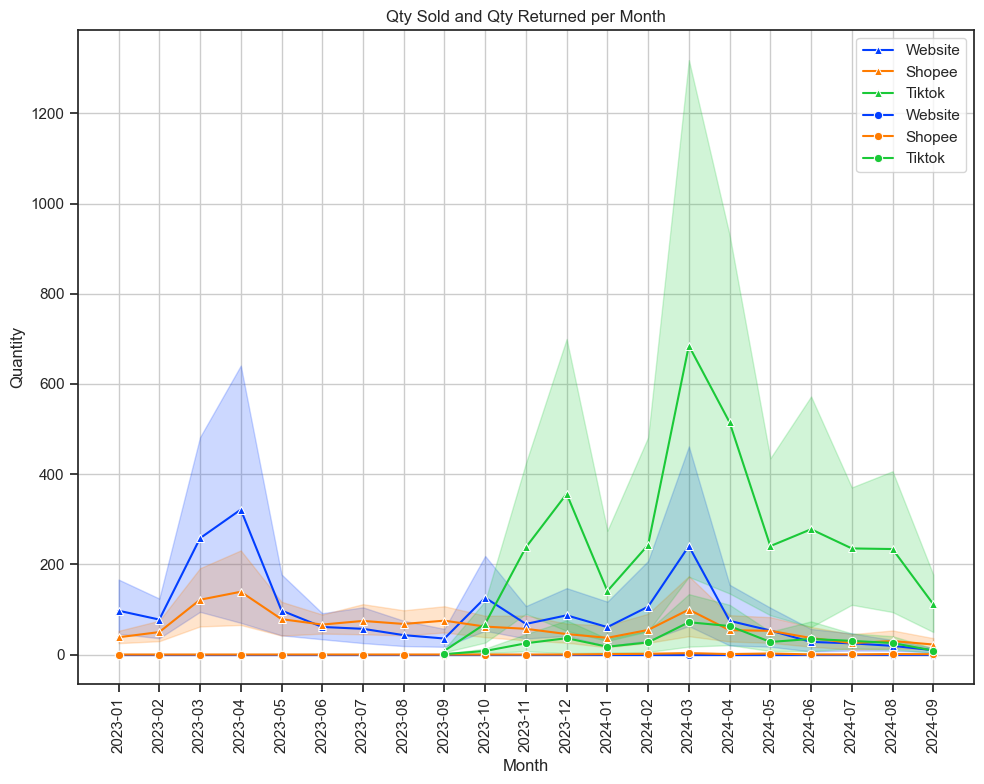

In [544]:
plt.figure(figsize=(10,8))
sns.lineplot(data=plot_dfAG_CDSCPQ, x='Year_Month', y='Quantity', hue='Store', palette='bright', marker='^')
sns.lineplot(data=plot_dfAG_CDSCPQ, x='Year_Month', y='Returned_Quantity', hue='Store', palette='bright', marker='o')
# sns.lineplot(data=plot_dfAG_CDSCPQ, x='Order_Date', y='Return_Rate', hue='Store', palette='dark')

plt.title('Qty Sold and Qty Returned per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df2_combine.groupby('Design').agg({'Nett_Amount': 'sum'}).reset_index().sort_values(by='Nett_Amount', ascending=False)[:2]

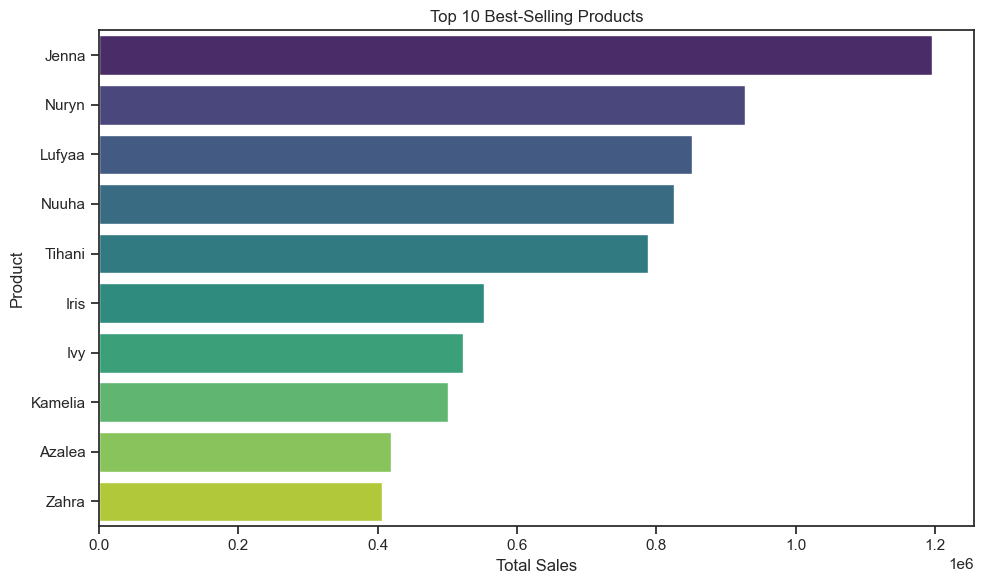

In [545]:
# Top 10 best-selling products
dfAG_DCP = df2_combine.groupby('Design').agg({'Nett_Amount': 'sum'}).reset_index()
dfAG_DCP = dfAG_DCP.sort_values(by='Nett_Amount', ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(data=dfAG_DCP, x='Nett_Amount', y='Design', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


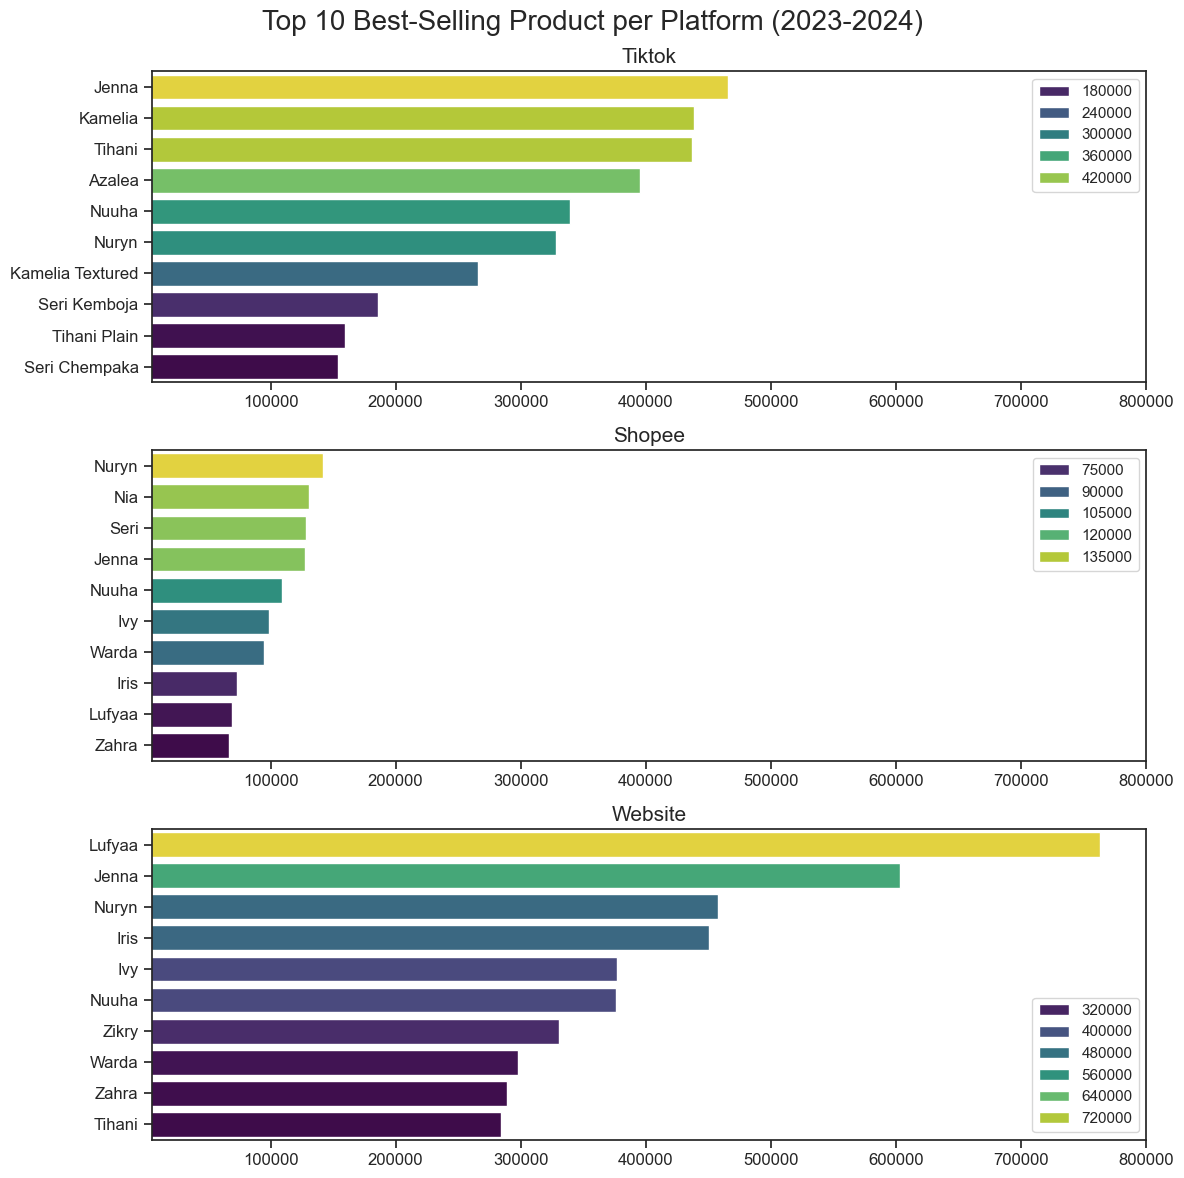

In [594]:
# Top 10 best product per platform
a = 'Store'
c = 'Quantity'
x = 'Nett_Amount'
y = 'Design'
# main plot
fig, ax = plt.subplots(len(dfAG_S), 1)
sns.set_theme(style='ticks')
# fig, ax = plt.subplots(len(dfAG_S), 1, figsize=(12,12))
# sns.set_theme(style='ticks',rc={'figure.figsize':(12,12)})

# loop each design in each store for inner plot
for i, title in enumerate(dfAG_S):
    plot_dfAG_SDPQ = dfAG_SDPQ[dfAG_SDPQ[a] == title].sort_values(by=x,ascending=False)[:10]
    # inner plot
    # sns.set(font_scale=1.5)
    sns.barplot(data=plot_dfAG_SDPQ, x=x, y=y, ax=ax[i], hue=x, palette='viridis')
    ax[i].set_title(title, fontsize=15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].legend()
    ax[i].set_xlim(5000,800000) # make the scales the same

fig.suptitle('Top 10 Best-Selling Product per Platform (2023-2024)', fontsize=20)
fig.tight_layout (h_pad=1) # fix the overlap
plt.show()